ANALYSIS

Observed Trend 1:  Intuitively, the number of rides per city decreases as an area becomes less densely populated.  This is illustrated nicely by the bubble plot, where the leftmost points are generally yellow for rural areas.  Moving right, we see the blue suburban cities, and finally the rightmost portion of the graph is filled with urban areas.

Observed Trend 2:  In general, a ride's average fare decreases the more densely populated the area.  This also makes sense intuitively, due to the presence or lack of other options for riders.

Observed Trend 3:  While rural areas made up only 1.8% of the total rides, they collected an outsize 6.6% of fares.  The cost of a ride might be a pain point for rural riders and a potential opportunity for improvement.

In [145]:
#SCENARIO 1:  PYBER

#import necessary tools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv
import numpy as np
import matplotlib.lines as lines
import matplotlib.axes as ax

In [146]:
#read in CSV data and create data frames
city_data = "city_data.csv"
ride_data = "ride_data.csv"

df_city = pd.read_csv(city_data)
df_ride = pd.read_csv(ride_data)
df = pd.merge(df_city,df_ride,on="city",how='outer').sort_values(by="ride_id")

In [147]:
#for data visualization
print(df.shape)
print(df_ride.shape)
print(df_city.shape)
df.head()

(2407, 6)
(2375, 4)
(126, 3)


,city,driver_count,type,date,fare,ride_id
1666,West Evan,4,Suburban,2016-02-03 15:50:57,17.57,2238752751
1673,South Gracechester,19,Suburban,2016-09-08 06:53:25,23.25,7522667629
2080,Port Alexandria,27,Suburban,2016-08-10 12:16:09,31.75,11622863980
2330,Kennethburgh,3,Rural,2016-02-29 21:50:59,47.48,12105457917
236,Lisaville,66,Urban,2016-09-30 22:29:40,31.06,18075235678


In [148]:
#create data frame with average fare by city
df_average_fare = df.groupby(['city']).mean().reset_index().rename(columns={"fare": "average_fare"}).drop(['driver_count','ride_id'],axis=1)

#create data frame with total ride count by city
df_ride_count = df.groupby(['city']).count().reset_index().rename(columns={"ride_id": "ride_count"}).drop(['type','date','driver_count','fare'],axis=1)

#merge these data frames with the main data frame
df = pd.merge(df,df_average_fare,on="city",how='outer')
df = pd.merge(df,df_ride_count,on="city",how='outer')
df.head()

#create a new grouped data frame for our bubble plot
df_grouped = df.groupby(['city','type']).mean().reset_index().drop(['fare','ride_id'],axis=1)
df_grouped.head()

,city,type,driver_count,average_fare,ride_count
0,Alvarezhaven,Urban,21.0,23.928710,31.0
1,Alyssaberg,Urban,67.0,20.609615,26.0
2,Anitamouth,Suburban,16.0,37.315556,9.0
3,Antoniomouth,Urban,21.0,23.625000,22.0
4,Aprilchester,Urban,49.0,21.981579,19.0


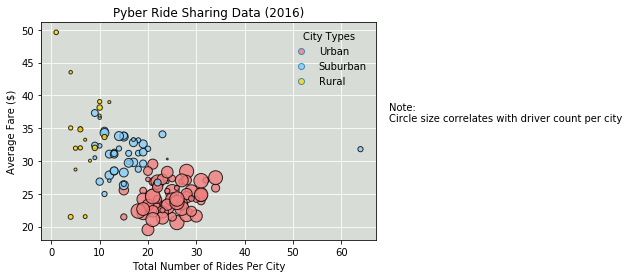

In [149]:
#CREATE AND FORMAT THE BUBBLE PLOT

#create a color key and merge it with full data frame
new_dict = {'type': ['Urban','Suburban','Rural'], 'color': ['lightcoral','lightskyblue','gold'] }
type_colors = pd.DataFrame.from_dict(new_dict) 
df_grouped = pd.merge(df_grouped,type_colors,on="type",how='outer')

#set parameters of scatter plot
plt.scatter(x=df_grouped['ride_count'], 
            y=df_grouped['average_fare'],
            s=df_grouped['driver_count']*3, 
            c=df_grouped['color'],
            alpha = 0.8,
            edgecolors="black",
            zorder=2)

#legend stuff
line1 = lines.Line2D(range(1), range(1), linewidth=0, marker='o', markerfacecolor='lightcoral', label='Urban',alpha = 0.8)
line2 = lines.Line2D(range(1), range(1), linewidth=0, marker='o', markerfacecolor='lightskyblue', label='Suburban',alpha = 0.8)
line3 = lines.Line2D(range(1), range(1), linewidth=0, marker='o', markerfacecolor='gold', label='Rural',alpha = 0.8)
plt.legend(handles=[line1, line2, line3], title='City Types', frameon=False)

#labeling and other appearance specifications
plt.xlabel("Total Number of Rides Per City") #label x-axis
plt.ylabel("Average Fare ($)")  #label y-axis
plt.title("Pyber Ride Sharing Data (2016)")  #add title
plt.grid(color='white',zorder=1)  #white gridlines
plt.text(70, 36, "Note: \nCircle size correlates with driver count per city")  #add note on side of graph
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')  #gray background

plt.show()

In [150]:
#SET UP DATA FRAME FOR PIE CHARTS
df_types = df.groupby('type').sum().reset_index()
df_types

,type,driver_count,fare,ride_id,average_fare,ride_count
0,Rural,727,4255.09,658729360193746,4255.09,1015
1,Suburban,9730,20335.69,3139583688401015,20335.69,13475
2,Urban,64501,40078.34,7890194186030600,40078.34,41251


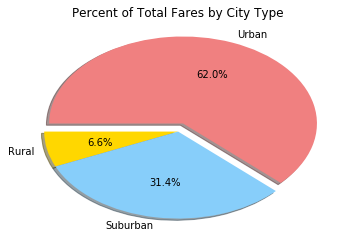

In [151]:
#PERCENT OF TOTAL FARES BY CITY TYPE
plt.pie(df_types['fare'],
        labels = df_types['type'], 
        explode=[0,0,0.1],shadow=True, 
        colors=['gold','lightskyblue','lightcoral'],
        startangle=180,
        autopct="%1.1f%%")
plt.title("Percent of Total Fares by City Type")
plt.show()

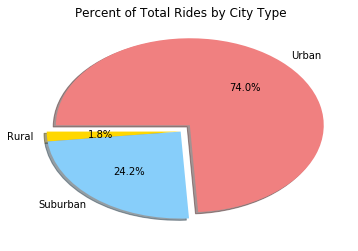

In [152]:
#PERCENT OF TOTAL RIDES BY CITY TYPE
plt.pie(df_types['ride_count'],
        labels = df_types['type'], 
        explode=[0,0,0.1],shadow=True, 
        colors=['gold','lightskyblue','lightcoral'],
        startangle=180,
        autopct="%1.1f%%")
plt.title("Percent of Total Rides by City Type")
plt.show()

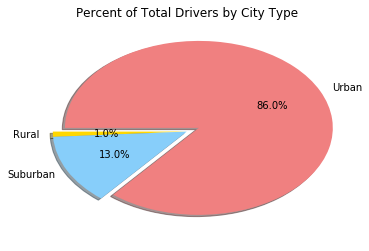

In [153]:
#PERCENT OF TOTAL DRIVERS BY CITY TYPE
plt.pie(df_types['driver_count'],
        labels = df_types['type'], 
        explode=[0,0,0.1],shadow=True, 
        colors=['gold','lightskyblue','lightcoral'],
        startangle=180,
        autopct="%1.1f%%")
plt.title("Percent of Total Drivers by City Type")
plt.show()